# Naive Bayes Classifiers:

### Naive Bayes Classifiers : a simple, probabilistic classifier family

- These classifiers are called "Navie" because they assume that features are conditionally independent, given the class. 
- In other words, they assume that for all instances of a given class, the features have little/no correlation with each other. 
- Highly efficient learning and prediction.
- But generalization performance maybe worse than more sophisticated learning methods. 
- Can be competitive for some tasks.

### Navie Bayes Classifier Types:

- **Bernoulli**: binary features (e.g. word presence/absence)
- **Multinomial**: discrete features (e.g. word counts) 
- **Gaussian**: continuous/real-valued features
    - Statistics computed for each class:
        - For each feature: mean, standard deviation
       


Before going to Navie Bayes classifiers, we are looking at some datasets as follows:

<IPython.core.display.Javascript object>


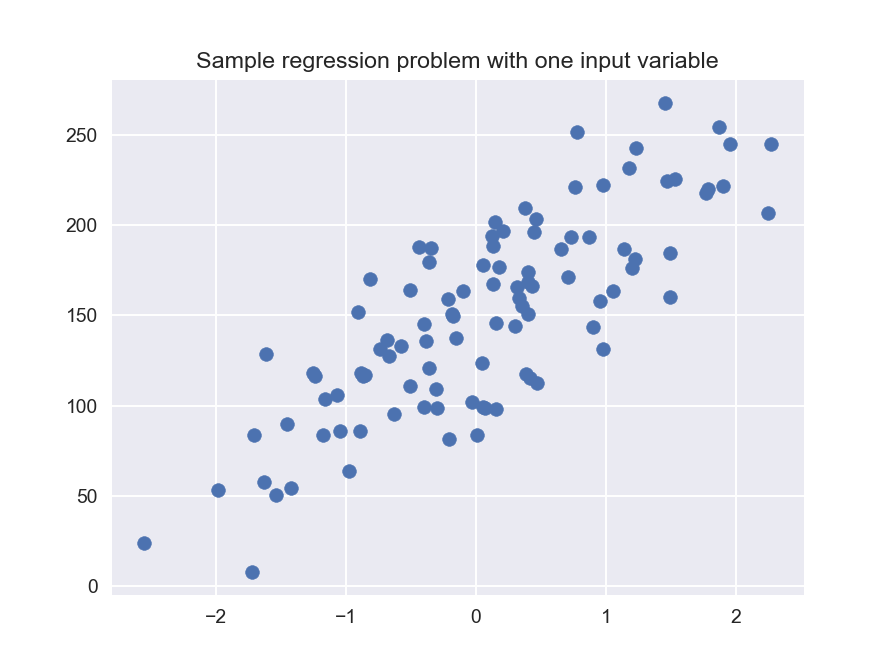

<IPython.core.display.Javascript object>


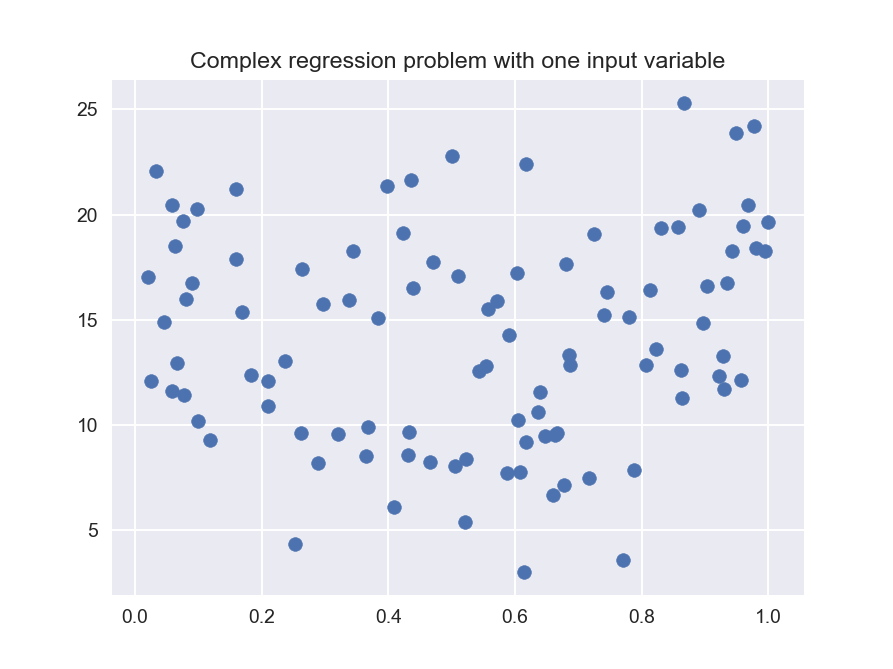

<IPython.core.display.Javascript object>


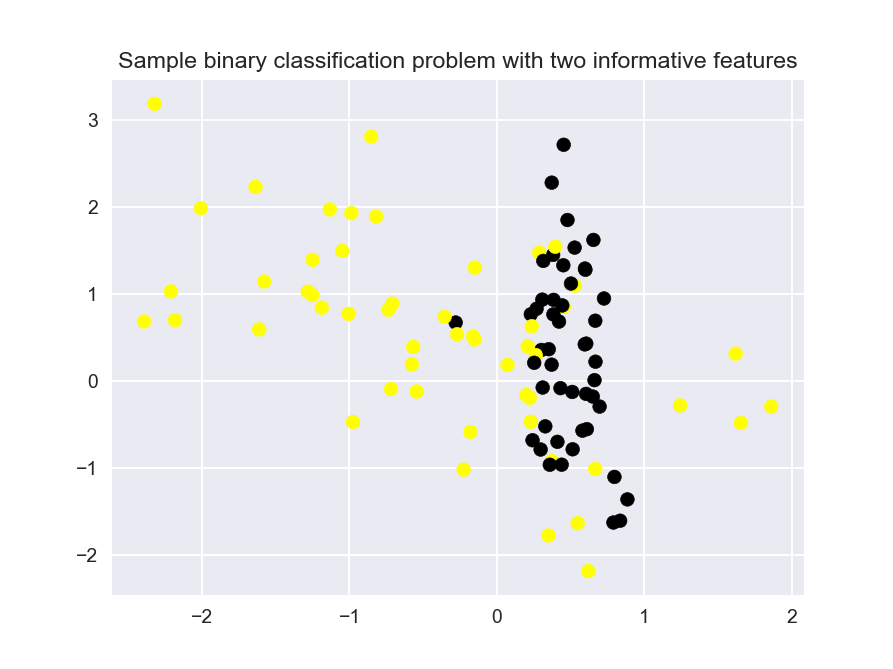

<IPython.core.display.Javascript object>


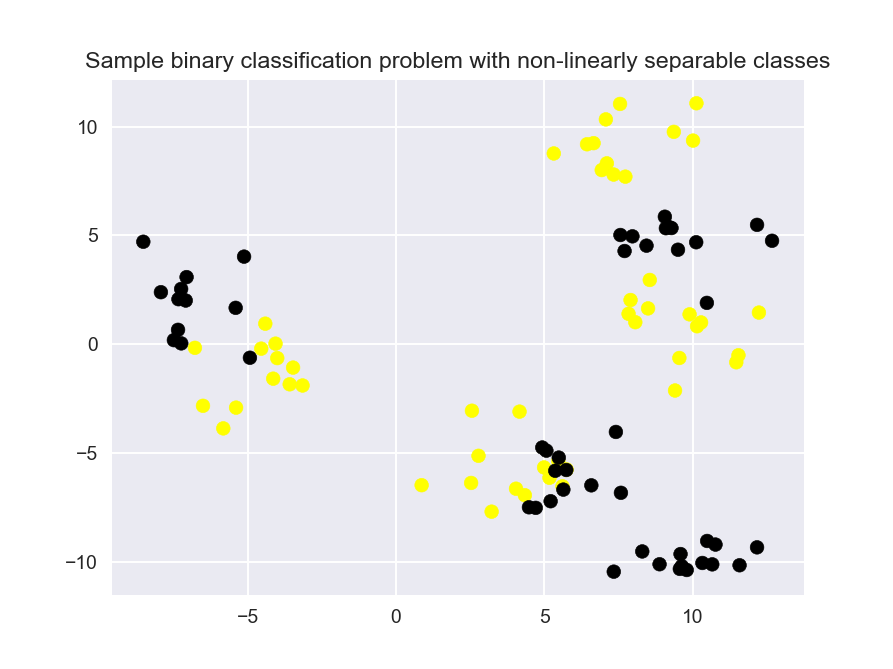

In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

## Naive Bayes classifiers

<IPython.core.display.Javascript object>


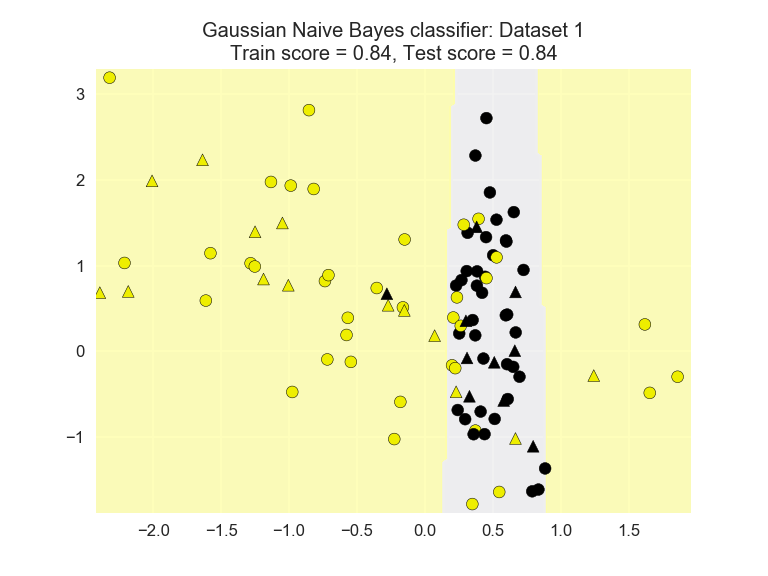

In [5]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test, 
                                 'Gaussian Naive Bayes classifier: Dataset 1')

### Application to a real-world dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer datastet')
print('Accuracy of GaussianNB classifier on training set is: {:.3f}'.format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set is: {:.3f}'.format(nbclf.score(X_test, y_test)))

Breast cancer datastet
Accuracy of GaussianNB classifier on training set is: 0.951
Accuracy of GaussianNB classifier on test set is: 0.937


In [8]:
from IPython.display import Image

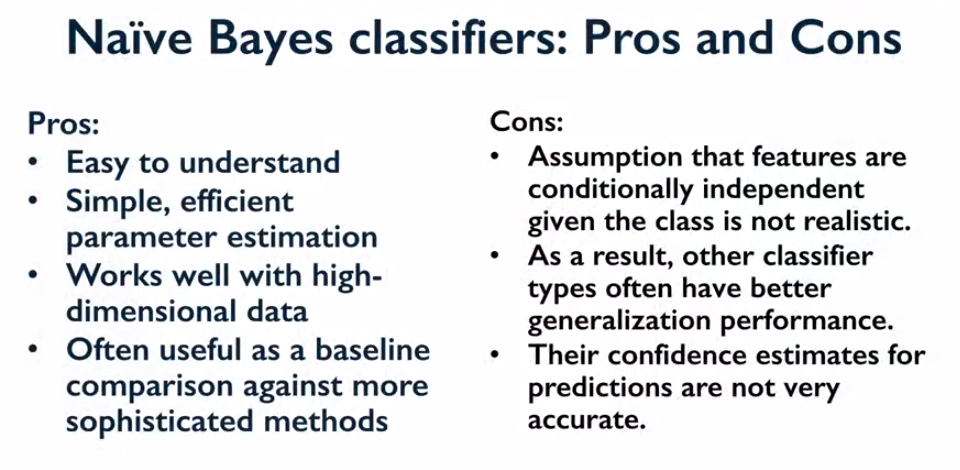

In [9]:
Image('Naive_bayes_classifier_pros_cons.png')

## Random Forests

- An ensemble of trees, not just one tree.
- Widly used, very good results on many problems. 
- sklearn.ensemble module:
    - Classification: RandomForestClassifier
    - Regression: RandomForestRegressor
- One decision tree is prone to overfitting.
- Many decision trees as one model is more stable with better regularization
- Ensemble of trees shouldbe diverse: introduce random variation into tree-building.

### Random Forest *max_features* Parameter

- Learning is quite sensitive to *max_feature*
- Setting *max_features = 1* leads to forests with diverse, more complex trees.
- Setting *max_features < close to number of featurers>* will lead to similar forests with simpler trees.

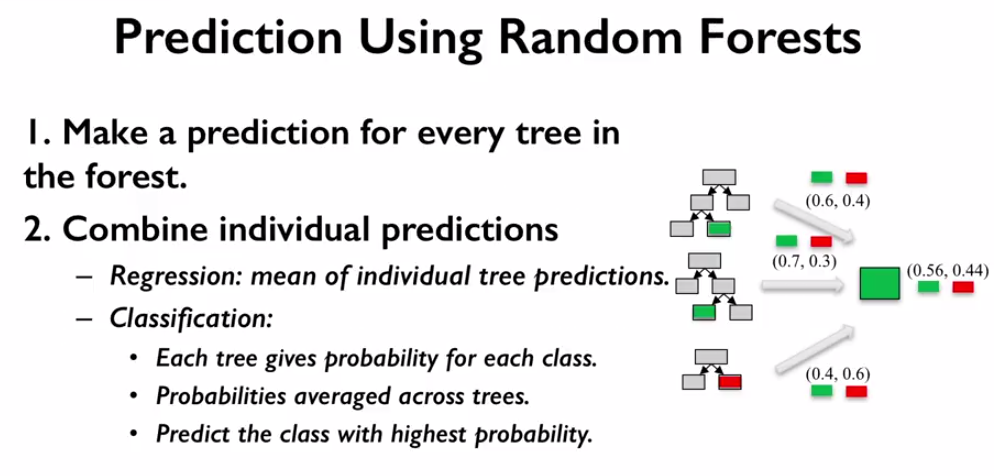

In [10]:
Image('Random_Forests_Prediction.png')